### Fourier transform for Mass Spectrometry course
*Marc-André Delsuc - Cabourg april 2018*


---
# Fourier transform Practical

---

###  loading libraries and utilities

python is a simple program, one of its strength lies in all the libraries available - in particular scientific ones (see above)

Some are directly a part of the standard language (web interface, cryptogrphy, data-base, etc.)
Others are developped independently, with the standard scientific stack : **numpy, scipy, sympy, matplotlib, pandas** that we are going to use here.


In [1]:
from __future__ import print_function, division    # this insures python 2 / python 3 compatibility
# numpy provides a fast computation of large numerical arrays
import numpy as np     # (here we just give numpy the (standard) nick name np for easing the source code)

# matplotlib is the graphic library
# matplotlib.pylab is an easy to use utility, a bit reminiscent to matlab graphics
import matplotlib as mpl
import matplotlib.pylab as plt

# matplotlib is a "magic" command to insert directly the graphics in the web page
%matplotlib inline

# %pylab inline
# is a short cut for the lines above

In [2]:
# let's use it to generate a pseudo-signal
x = np.linspace(0,10,1000)    # a vector of 1000 points equi distant from 0.0 to 10.0
freq = 3.0
y = np.cos(freq*x)                 # takes the cos() values of all points in x - this will be the signal
print('length of vectors, x:',len(x), 'y:',len(y))
print('433th value:', x[432], y[432])    # !!! array indices are from 0 to 999 !!

length of vectors, x: 1000 y: 1000
433th value: 4.32432432432 0.918469858159


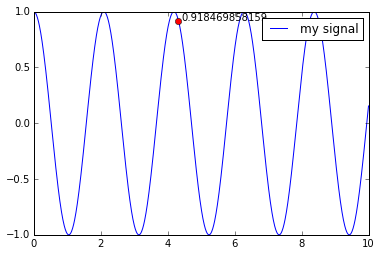

In [3]:
# and plot it - like in Excel !
plt.plot(x,y, label='my signal')
# add a point for the 433th element
plt.plot(x[432],y[432], 'ro')   # r is for red   o is for round points
plt.text(x[432]+0.1, y[432], str(y[432]))
plt.legend();

# basic FT

In [4]:
# using FFT is as simple as
from numpy import fft      # as fft is just giving it a short nick-name
# this is just about what you have to know !

# (note in the live course I used a different library, using
# from scipy import fftpack as fft
# for which I discovered a slight problem afterwards - but both libraries are nearly equivalent )

### *(One important remark about this course*

*Fourier transform (or **FT**) is defined as a transformation of *continuous functions* $f$ from $\mathbb{R}$ to $\mathbb{C}$), they have to be integrable over $]-\infty ... \infty[$, and can be extended to the limit to *distributions* which somehow drops this later condition.*

*What we're doing here is very different, it is another transform, called digital Fourier transform (or **DFT**), perfectly defined in mathematical terms, but very different in its form, that applies to finite series of values $y_k$.
DFT applies in the computer, were we are going to compute of *vectors* of values `x[k]` as a representation of the series $x_k$.
In the computer, DFT transforms thus a vector into another vector, as it is a linear operation, it can be represented by a (usually square) matrix, and would take a burden proportional to $N^2$ to compute for a vector of length $N$.
Thanks to Cooley & Tuckey(1) there is an very efficient algorithm that does it in $N \log_2(N)$ operations provided $N$ is a power of two ($N=2^k$), and which is called Fast Fourier transform (or **FFT**).
FFT and DFT are strictly equivalent, as there are now effecient implementations that work well for nearly all $N$ values.
DFT and FT share so many properties in common that they will be considered as one same thing in the course*

1) Cooley, J., & Tukey, J. (1965). An algorithm for the machine calculation of complex Fourier series. Mathematics of Computation, 19(90), 297–301.

*end of remark)*

YY type: complex128


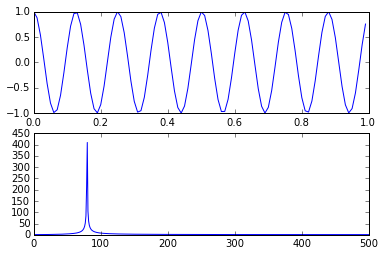

In [5]:
freq = 50.0
y = np.cos(freq*x)
YY = fft.rfft(y)                     # rfft() is the FT of a real vector (here y) - the result is complex
print('YY type:',YY.dtype)                      # to check type
f, (ax1,ax2) = plt.subplots(nrows=2) # a multiple plot, with 2 “rows"
ax1.plot(x[0:100], y[0:100])                   # y[0:100] is a way of telling - only the first 100 points,
ax2.plot(abs(YY));                    # abs(YY) is the module of the complex YY

Here we see the **two reciprocal domains** 
- direct (time for instance) domain above 
- indirect (frequency for instance) dmain below

we do not have to give a frequency axis, because it is implicitely defined, not also that the axis used for the plot is arbitrary, only counting points (*yes, 500 = half of the points from 'y' , we'll come to this later*)


## frequency limits  - Aliasing - Nyquist frequency
Let's use an interactive version of the above to find the frequency limits

In [6]:
# load the interactive tool
from ipywidgets import interact, interactive, widgets, fixed
try:
    from ipywidgets import Layout
except:
    pass # we'll do without

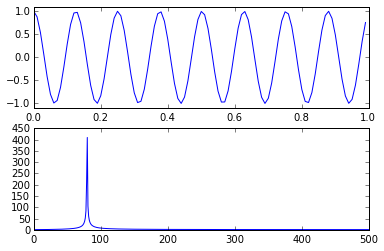

In [7]:
# we define a function fta() which does the same as the lines above
def fta(freq = 50.0):
    "showing aliasing effect - and Nyquist frequency"
    y = np.cos(freq*x)
    YY = fft.rfft(y)
    f, (ax1,ax2) = plt.subplots(nrows=2)
    ax1.plot(x[0:100], y[0:100])
    ax1.set_ylim(ymin=-1.1, ymax=1.1)
    ax2.plot(abs(YY))
# then use it interactively, 
interactive( fta, freq=(0.0,500.0))

by playing with the `freq` cursor, try to
- see what happens for low / high frequencies
- detect a strange behavior (frequency inversion ?) for high frequencies
- determine as precisely as possible the frequency at which the behavior changes
- observe the stroboscopic effects around this peculiar frequency
- find what is the special content of the `y` vector at this frequency

---

i) As you can observe, at high frequency, the line in the Fourier spectrum folds back to lower frequency, and is thus located at a wrong position in the spectrum. This effect is called **Aliasing**

ii) the frequency at which the folding occurs when the sampled signal `y` oscillates up and down for exactly each sampling point. It means that the frequency of the signal is exactly half of the sampling frequency (there is exactly 2 measures per signal period).

This special frequency, called the **Nyquist frequency**, corresponds to the highest frequency which can be measured in this regularly sampled signal; it is half of the sampling frequency.
Using $SW$ as the *spectral width*, $SF$ as the *sampling frequency*, and $\Delta t$ the sampling period,
this is commonly noted :
$$
SW = \frac 1 2 SF
$$
or
$$
SW = \frac 1 {2 \Delta t}
$$
sometimes called the *Nyquist-Shannon* theorem (or just *Shannon* theorem)

So, the `fft()` function creates a spectrum from 0 to $SW$. Here, the `x` vector (the sampling) contains 1000 values over 10 sec., so we're sampling at $\frac 1 {100} sec$, hence $SW = 50$ Hz.
We find the folding for a cursor arond 314.0 which corresponds exactly to the expected value $2 \pi \times 50$ Hz.
(`cos()` expects values in radian not in Hz, thus the $2 \pi$).

(check [Wikipedia:Nyquist–Shannon_sampling_theorem](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem) )

We can now redraw the same picture, with correct labels:

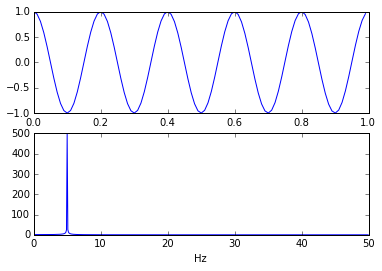

In [8]:
def fta2(freq = 5.0):
    "showing aliasing effect - and Nyquist frequency"
    y = np.cos(2*np.pi*freq*x)   # this time in Hz
    YY = fft.rfft(y)
    deltat = x[1]               # as x[0] is 0, x[1] = \Delta t
    faxis = np.linspace(0,1/(2*deltat), len(YY))
    f, (ax1,ax2) = plt.subplots(nrows=2)
    ax1.plot(x[0:100], y[0:100])
    ax1.set_xlabel('sec')
    ax2.plot(faxis, abs(YY))
    ax2.set_xlabel('Hz')
# then use it interactively, 
interactive( fta2, freq=(0.0,70.0))

---
# duration / width - compaction properties - Gabor Limit - uncertainty  theorem
let's try to modify the signal to see what happens

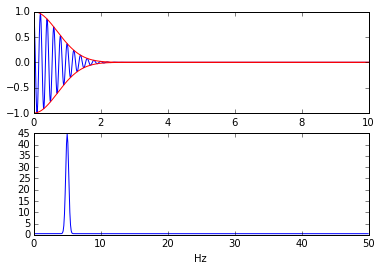

In [9]:
def ftb(br = 1.0):
    "function showing the effect of broadening"
    freq = 5.0      # a fixed frequency
    y = np.cos(2*np.pi*freq*x)  
    gauss = np.exp(-(br*x)**2)   # this is the decay with a gaussian shape 
    yg = y*gauss
    YY = fft.rfft(yg)
    f, (ax1,ax2) = plt.subplots(nrows=2)
    ax1.plot(x, yg)
    ax1.plot(x, gauss, 'r')     # draw the enveloppe
    ax1.plot(x, -gauss, 'r')     # draw the enveloppe
    ax1.set_xlabel('sec')
    deltat = x[1]               # as x[0] is 0, x[1] = \Delta t
    faxis = np.linspace(0,1/(2*deltat), len(YY))
    ax2.plot(faxis, YY.real)
    ax2.set_xlabel('Hz')
# we used a detailed widget here, to have a better control
try:
    w=interactive( ftb, br=widgets.FloatSlider(min=0,max=20,value=.5,step=0.01,layout=Layout(width='70%')))
except:
    w=interactive( ftb, br=(0.0, 20.0, 0.5))
w

observe
- how the line broadens when the signal decays faster
- how the intensity in the spectrum evolves with the broadening
- a point where both shape: the time domain envelop (red) and the spectrum have equivalent width
- how, when one domain is "localized" in one place the other is "extended" over the whole range
- how the frequency "disappears" for decays faster than a period

We observe here a very central property of Fourier transform, which can be stated in several ways:
- *One cannot simultaneously sharply localize a signal in both the time domain and the frequency domain*
- a signal cannot be bounded in both domains in the same time (*bounded* here means 0 outside a region *[min - max]* )
- product of the width of signal in both domains is constant, the width is also the **uncertainty** ($\sigma_F$ of the exact frequency in the spectrum - $\sigma_t$ of the position in time in the direct signal), so it is stated as:
$$
\sigma_t \sigma_F \gtrsim \frac 1 {4 \pi}
$$
(check [Wikipedia:Uncertainty_principle](https://en.wikipedia.org/wiki/Uncertainty_principle#Signal_processing ) )
- in consequence, for a signal observed during a limited rime $T_{max}$, the resolution in frequence $\sigma_F$ is limited by the **Gabor limit** : $\sigma_F \gtrsim \frac 1 {4 \pi T_{max}}$

---
# Complex signal - phase properties

For simplification sake, so far, we have been using a real signal.
Now, let us look at what happens when working with full complex signal...

First we construct a complex signal ( the imaginary number $i$ is noted `1j` in python),
then use `fft()` rather than `rfft()` as previously (*`r`in `rfft` stands for real*)


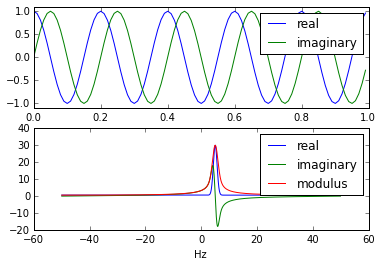

In [10]:
def ftc(freq = 5.0, br = 3.0):
    "function showing the complex part of the signal and of the spectrum"
    y = np.cos(2*np.pi*freq*x)  +  1j * np.sin(2*np.pi*freq*x)    # a complex signal
    gauss = np.exp(-(br*x)**2)
    yg = y*gauss
    YY = fft.fftshift(fft.fft(yg))                                # fftshift() ensures the 0 freq in the center
    f, (ax1,ax2) = plt.subplots(nrows=2)
    ax1.plot(x[0:100], y[0:100].real, 'b', label='real')          # .real is for real part;  'b' is for blue
    ax1.plot(x[0:100], y[0:100].imag, 'g', label='imaginary')
    ax1.legend(loc=1)
    ax1.set_ylim(ymin=-1.1,ymax=1.1)
    deltat = x[1]               # as x[0] is 0, x[1] = \Delta t
    faxis = np.linspace(-1/(2*deltat),1/(2*deltat), len(YY))
    ax2.plot(faxis, YY.real, 'b', label='real')
    ax2.plot(faxis, YY.imag, 'g', label='imaginary')
    ax2.plot(faxis, abs(YY), 'r', label='modulus')
    ax2.set_xlabel('Hz')
    ax2.legend(loc=1)
interactive( ftc, freq=(-70.0,70.), br=(0.0,20.0))

#### Now a lot of things have changed, observe:
- the cosine and sine in the time domain
- the frequency has now a sign, which is related to the "direction" of the rotation
- the frequency axis now goes from -Nyquist to +Nyquist, so the actual spectral width is double now : [-max...max].
- how the folding above the Nyquist frequency is modified, and now is done in a circular manner

This is due to the complex sampling of the signal, something not always available on the instrument, depending on the spectroscopy.

#### on the spectrum
- the imaginary part, in green, is 0 at resonance, with a sign inversion at this point.
- the real part, blue, is narrower than the imaginary part, in particular far from resonance
- the modulus, in red, is a composite of both parts
- how the shape and the position are completely independent, this is the *convolution* property, we'll see this later on.

These features of the spectrum here are not specific to the fact that the signal was complex, and were present also in the previous computation (*note how on `fta()` we were looking at `abs(YY)`, while in `ftb()` it was `YY.real`*) 


The blue line is said to be the **absorptive** line-shape, while the green is the **dispersive** line-shape.

we can now add an additional parameter, **the phase** of the signal.
Adding a phase $\theta$ to the signal simply consists in multiplying it by value $a = e^{i \theta}$ a complex value with angle $\theta$ modulus equal to 1.0.
(*check [complex_reminder](complex_reminder.ipynb) if you are unsure*)

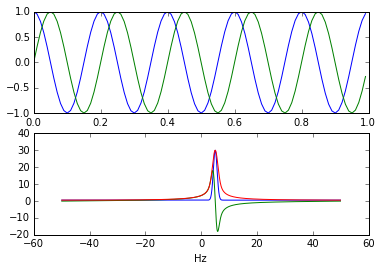

In [11]:
def ftc2(freq = 5.0, br = 3.0, theta = 0.0):
    "function showing the effect of a phase rotation"
    phase = theta*2*np.pi/360
    y = np.cos(2*np.pi*freq*x + phase)  +  1j * np.sin(2*np.pi*freq*x + phase)    # a complex signal
    gauss = np.exp(-(br*x)**2)
    yg = y*gauss 
    YY = fft.fftshift(fft.fft(yg))                                # fftshift() ensures the 0 freq in the center
    f, (ax1,ax2) = plt.subplots(nrows=2)
    ax1.plot(x[0:100], y[0:100].real, 'b')                        # .real is for real part;  'b' is for blue
    ax1.plot(x[0:100], y[0:100].imag, 'g')
    deltat = x[1]               # as x[0] is 0, x[1] = \Delta t
    faxis = np.linspace(-1/(2*deltat),1/(2*deltat), len(YY))
    ax2.plot(faxis, YY.real, 'b')
    ax2.plot(faxis, YY.imag, 'g')
    ax2.plot(faxis, abs(YY), 'r')
    ax2.set_xlabel('Hz')
# the angle theta is given in degrees !
interactive( ftc2, freq=(-70.0,70.), br=(0.0,20.0), theta=(0,360))


you can observe how

- the phase of the line in the spectrum rotates, and how dispersive and absorptive shape interchange
- how in the same time the modulus (in red) remains constant
- how a phase rotation of a time signal is equivalent of a shift in time *(for a stationary or near-stationary signal (stationary ≡ properties not varying in time))*

As an illustration, below is the 3D plot of the pair absorption/dispertion


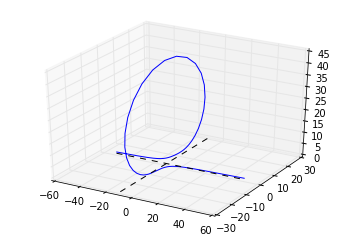

In [12]:
from mpl_toolkits.mplot3d import Axes3D
def ftc3(freq = -10.0,elevation=30.0, azimuth=60.0):
    br = 2
    y = np.cos(2*np.pi*freq*x)  +  1j * np.sin(2*np.pi*freq*x)    # a complex signal
    gauss = np.exp(-(br*x)**2)
    yg = y*gauss
    YY = fft.fft(yg)
    fig = plt.figure()
    ax = fig.gca(projection='3d',elev=elevation, azim=-azimuth)
    deltat = x[1]               # as x[0] is 0, x[1] = \Delta t
    faxis = np.linspace(-1/(2*deltat),1/(2*deltat), len(YY))
    ax.plot(faxis,fft.fftshift(YY).imag,fft.fftshift(YY).real)
    ax.plot([-50,50],[0,0],[0,0],'--k')
    ax.plot([freq,freq],[-30,30],[0,0],'--k')
interactive( ftc3, freq=(-40.0,40.),elevation=(1.0,90), azimuth=(0.0,180))

---
# celebrity couples

![](files/Amal-George-Clooney.jpg)

In [13]:
# some hard coding first, don't worry if you don't get it
def gate(width=10):
    "return a gate function over x"
    r = np.zeros_like(x)
    r[:width] = 1.0
    r[-width:] = 1.0
    return r
def gauss(width=1.0):
    "return a centered gaussian function over x"
    r = np.exp(-((x-5)/width)**2)
    return fft.fftshift(r)
def exp(width=1.0):
    "return a centered exp function over x"
    r = np.exp(-abs(x-5)/width)
    return fft.fftshift(r)
def noise(width):
    return np.random.randn(len(x))
def position(width):
    "the delta function"
    r = np.zeros_like(x)
    r[width] = 1.0
    return r
def draw(width, f, name):
    "builds the nice drawing"
    fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,2.5))
    y = f(width=width)
    xax = np.linspace(-5,5,1000)
    yax = np.linspace(-50,50,1000)
    YY = fft.fftshift(fft.fft(y))
    ax1.plot(xax, fft.fftshift(y), label=name)
    ax2.plot(yax, YY.real, label='FT('+name+')')
    ax1.legend(loc=1)
    ax2.legend(loc=1)

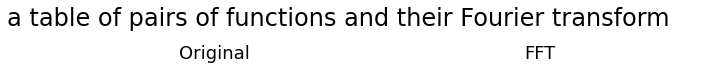

In [14]:
fig, ax1= plt.subplots( figsize=(12,0.5))
fig.text(0.1,0.9,"a table of pairs of functions and their Fourier transform",fontdict={'size': 24,})
fig.text(0.3,0,'Original',fontdict={'size': 18,}); fig.text(0.7,0,'FFT',fontdict={'size': 18,})
ax1.set_axis_off()

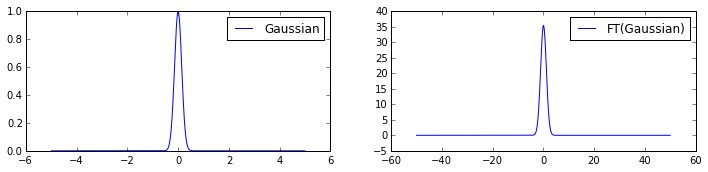

In [15]:
interactive(draw, width=widgets.FloatSlider(min=0.01,max=3,step=0.01,value=0.2), f=fixed(gauss), name=fixed('Gaussian'))

the FT of a Gaussian is another Gaussian

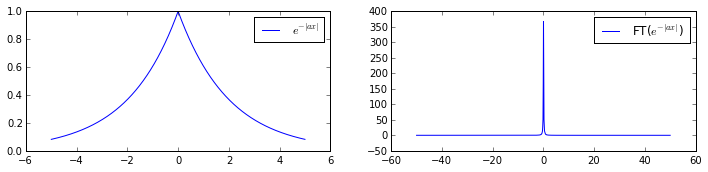

In [16]:
interactive(draw, width=widgets.FloatSlider(min=0.01,max=3,step=0.01,value=2), f=fixed(exp), name=fixed('$e^{-|ax|}$'))

the FT of the decaying exponential is a Lorenzian line-shape, found in many spectroscopies, with generic expression for the absorptive shape:
$$
F(\omega) = \frac {2A} {A^2+(\omega -\omega_o)^2}
$$

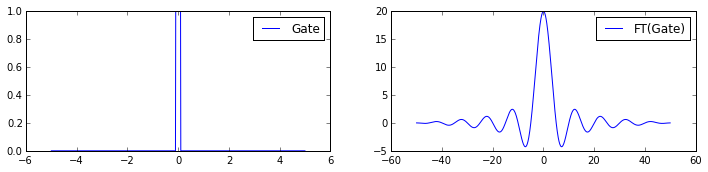

In [17]:
interactive(draw, width=widgets.IntSlider(min=1,max=1000,value=10), f=fixed(gate), name=fixed('Gate'))

the gate (1.0 for a period,0 everywhere else) has for Fourier transform the function $sinc(x) = \frac {\sin(x)}{ x}$  

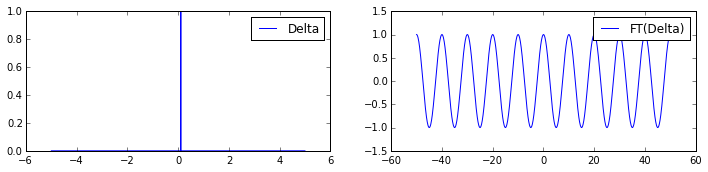

In [18]:
interactive(draw, width=widgets.IntSlider(min=-500,max=500,value=10), f=fixed(position), name=fixed('Delta'))

the FT of a $\delta$ function at position $x_o$ is the sinusoid with frequency $x_o$

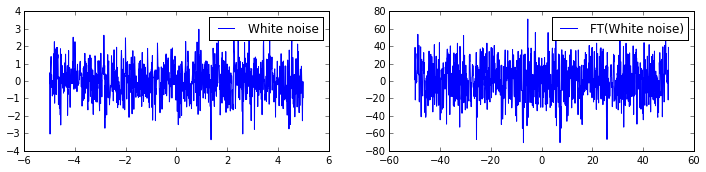

In [19]:
draw(0,noise,'White noise')

FT of a uncorrelated, centered random process with normal law (white noise), is white noise !

see also
[Wikipedia:Fourier_transform](https://en.wikipedia.org/wiki/Fourier_transform#Square-integrable_functions)

# some other properties of the Fourier transform
worth mentionning, and usually found in other FT courses, so I ought to put them here !

## FT is inversible
This means that no information is lost nor created by FT, it is just a different point of view

and FT inverse is very similar to FT itself

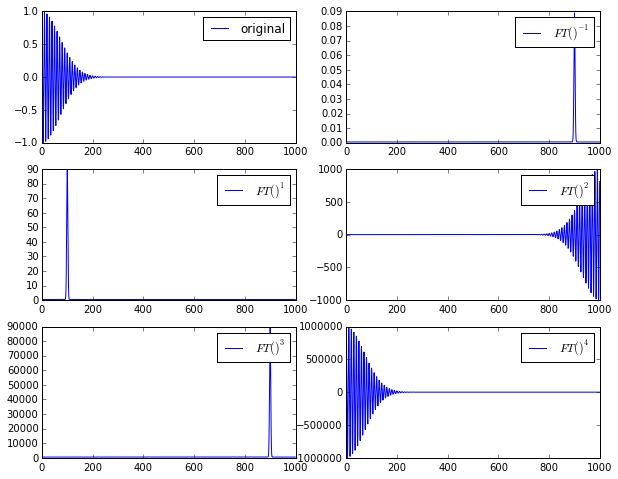

In [20]:
freq = 10.0
br = 1.0
y = np.cos(2*np.pi*freq*x)  +  1j * np.sin(2*np.pi*freq*x)    # a complex signal
gauss = np.exp(-(br*x)**2)
yg = y*gauss
f, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3,ncols=2, figsize=(10,8))
ax1.plot(yg.real, label='original')
ax2.plot(fft.ifft(yg).real, label='$FT()^{-1}$')
ax1.legend()
ax2.legend()
YY = yg
for i,ax in zip(range(4),[ax3,ax4,ax5,ax6]):
    YY = fft.fft(YY)
    ax.plot(YY.real, label='$FT()^%d$'%(i+1))
    ax.legend()


as you can see, $FT()^{-1}$ (the inverse of the FT) is just $FT()$ with the axis reversed.
This means that the "celebrity couples" table can be seen right to left as well as left to right.

$FT()^{-1} \equiv FT()^3$ and $FT()^{4}$ is the identity

This is very similar to $i$ with $i^3 = -i$ and $i^4 = 1$

## FT is linear

broadly speaking, it means that the FT of a sum is the sum of the FT:
$$
FT(f+g) = FT(f) + FT(g) \\
FT(\lambda f) = \lambda FT(f)
$$
where $\lambda$ is a scalar, and $f$ and $g$ are functions

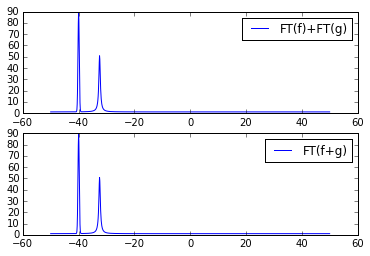

In [21]:
y2 = np.cos(3.5*np.pi*freq*x)  +  1j * np.sin(3.5*np.pi*freq*x)
y2 = y2*np.exp(-2*x)
f,(ax1,ax2) = plt.subplots(nrows=2)
yax = np.linspace(-50,50,1000)
ax1.plot(yax, fft.fft(y2).real+fft.fft(yg).real, label="FT(f)+FT(g)")
ax2.plot(yax, fft.fft(y2+yg).real, label="FT(f+g)")
ax1.legend()
ax2.legend();

This has a several strong implications:
- you can easily estimate the FT of a composite function, expressed as the sum of simple functions
- in spectroscopy / image processing / *you name it* adjacent signals/features do not interfere, they jus add-up
- in measurement, there is always noise, and FT has a strong impact on sgnal/noise ratio

let's have a example:

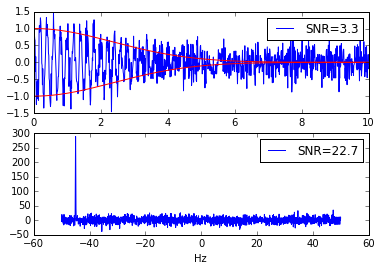

In [22]:
def ftb2(br = 0.3, noise=0.3):
    "function showing the effect of broadening on SNR"
    freq = 5.0      # a fixed frequency
    y = np.cos(2*np.pi*freq*x) + 1j*np.sin(2*np.pi*freq*x)  
    gauss = np.exp(-(br*x)**2)   # this is the decay with a gaussian shape 
    yg0 = y*gauss      # noise free signal
    yg = yg0 + noise*(np.random.randn(len(y)) +1j*np.random.randn(len(y)))    # np.random.randn() is a noise with standard deviation 1.0
    YY = fft.fft(yg,n=2000)
    snr = max(abs(YY))/np.std(YY[len(YY)//2:])    # std is the standard deviation
    if snr<3.0:
        SNR = 'N.A.'
    else:
        SNR = '%.1f'%snr
    f, (ax1,ax2) = plt.subplots(nrows=2)
    ax1.plot(x, yg.real, label='SNR=%.1f'%(1/noise))
    ax1.plot(x, gauss, 'r')     # draw the enveloppe
    ax1.plot(x, -gauss, 'r')     # draw the enveloppe
    ax1.set_xlabel('sec')
    ax1.legend()
    yax = np.linspace(-50,50,2000)
    ax2.plot(yax, YY.real, label='SNR=%s'%(SNR))
    ax2.set_xlabel('Hz')
    ax2.legend()
interactive( ftb2, br=(0.0,3.0,0.01), noise=(0.01,3.0))

Observe how the SNR after FT is sometimes higher than in time domain, (and sometime not).
SNR increases for time domain signals with small broadening, and is maximum with no broadening. 

Observe also how FT is able to extract a frequency from a signal completely buried into the noise, as long as this one lasts long enough.

The theoretical gain in $\frac {\sqrt{N}} 2$ where $N$ is the number of points on which the signal is observed.
Here we have 1000 points, is it verified ?

A signal is considered to be non-detetable for a SNR below 3.0

## Convolution

if linearity is for addition, convolution is for multiplication.

Convolution of two functions $f$ and $g$ is defined as: (noting it $\circledast$ )
$$
(f \circledast g)(t') = \int_{-\infty}^{\infty} f(t) g(t-t')dt
$$

This is a symmetric operation for $f$ and $g$, and can be described as $f$ and $g$ sharing their shapes.

Let see:

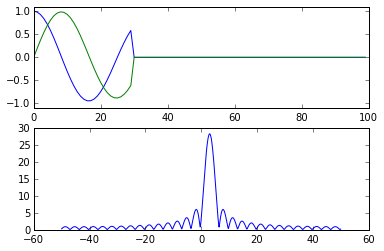

In [23]:
def ftcv(freq = 3.0, N=30, br=2.0):
    "showing convolution"
    y = np.cos(2*np.pi*freq*x)  +  1j * np.sin(2*np.pi*freq*x)
    g = np.zeros_like(x)
    g[0:N] = 1.0
    y = y*g
    y = y*np.exp(-br*x**2)
    YY = fft.fftshift(fft.fft(y))
    yax = np.linspace(-50,50,1000)
    f, (ax1,ax2) = plt.subplots(nrows=2)
    ax1.plot(y[0:100].real)
    ax1.plot(y[0:100].imag)
    ax1.set_ylim(ymin=-1.1, ymax=1.1)
    ax2.plot(yax, abs(YY))
interactive( ftcv, freq=(0.0,50.0), N=(4,500), br=(0,30))

in this example, we take the product of 3 different functions:
- a frequency (whose FT is a $\delta$ function)
- a gate (whose FT is a $sinc$ function)
- a gaussian (whose FT is a $gaussian$ function)

Observe
- the ripples created by short gates, call *wiggles*
- how you can mix the $sinc$ and the $gaussian$ shapes,
- how the convolution by a $\delta$ (a multiplication by a frequency) is equivalent to a shift
- how the line moves without the shape changing
- how the shape changes without the line moving
- why it is also a bad idea to have a line very close to the Nyquist frequency

## convolution in practice : apodisation
When the *wiggles* created by the gate are becoming a problem, it is usual to pre-process the data with a function which reduces these wiggles.This is call apodisation (sometimes, *wrongly* windowing)

Here is a list of the most common ones.

*Note, these apodisations are designed for modulus spectra, when computing phased spectra, you have to use a different apodisation familly*

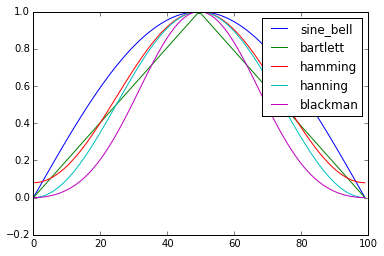

In [24]:
from numpy import blackman, hamming, hanning, bartlett, kaiser  # these are pre-defined
def sine_bell(N):                                       # this one is missing
    "defines the sine-bell apodisation window"
    return np.sin( np.linspace(0,np.pi,N) )
for apod in ("sine_bell", "bartlett", "hamming", "hanning", "blackman"):
    y = eval("%s(100)"%(apod))
    plt.plot(y,label=apod)
plt.legend();

The **kaiser** function is also very usefull as a generic/tunable apodisation function.

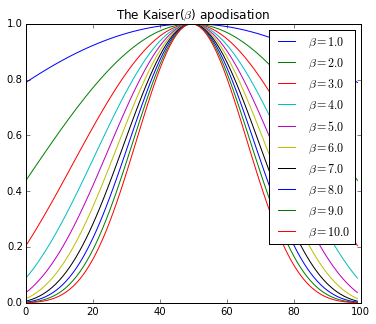

In [25]:
plt.figure(figsize=(6,5))
for beta in range(1,11):
    plt.plot(kaiser(100, beta), label=r"$\beta=%.1f$"%beta)
plt.legend()
plt.title(r'The Kaiser($\beta$) apodisation');

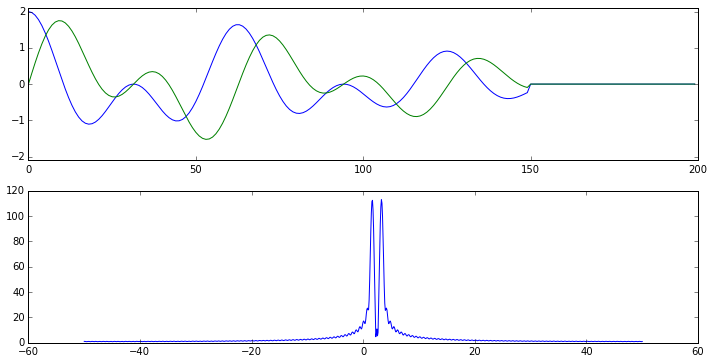

In [26]:
apodlist = ["None", "sine_bell", "bartlett", "hamming", "hanning", "blackman", "kaiser"]
def ftapod(freq1 = 10.0, freq2 = 20.0, br=0.5, N=150, apod="empty", beta=3.0):
    "showing convolution"
    y = np.cos(freq1*x)  +  1j * np.sin(freq1*x) + np.cos(freq2*x)  +  1j * np.sin(freq2*x)
    g = np.zeros_like(x)
    if apod == 'None':
        g[0:N] = 1.0
    elif apod == 'kaiser':
        g[0:N] = eval("%s(%d,%f)"%(apod,N,beta))
    elif apod != 'None':
        g[0:N] = eval("%s(%d)"%(apod,N))
    y *= g*np.exp(-br*x**2)
    YY = fft.fftshift(fft.fft(y))
    yax = np.linspace(-50,50,1000)
    f, (ax1,ax2) = plt.subplots(nrows=2, figsize=(12,6))
    ax1.plot(y[0:200].real)
    ax1.plot(y[0:200].imag)
    ax1.set_ylim(ymin=-2.1, ymax=2.1)
    ax2.plot(yax, abs(YY))
interactive( ftapod, freq1=(-50.0,50.0), freq2=(-50.0,50.0), br=(0.0,2.0), N=(4,500), apod=apodlist, beta=(1.0,10.0))

In this case, there are two lines, that you can control independently.
The windows have been set more or less in increasing order of broadening.
Note that only `kaiser` is controlled with the `beta` parameter, and covers most of the features of the other windows.

Try different combinaitions of line-width, separation, number of points and check the effect of each apodisation on it.

Observe
- how it always a trade-off between resolution and nice line-shape.
- Consider shape, FWMH, separation, wiggles intensities, ...
- how apodisation may, in some cases, actually improve the line shape